Feature Engineering

In [1]:
import pandas as pd
data = pd.read_csv('/home/any1/Documents/I2_Data_Science/Final_Project/data/processed_v2_eda_student_depression.csv')

# Preview the data
print(data.head())


   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  Sleep Duration  \
0            0.0  8.97                 2.0               0.0             2.0   
1            0.0  5.90                 5.0               0.0             2.0   
2            0.0  7.03                 5.0               0.0             1.0   
3            0.0  5.59                 2.0               0.0             3.0   
4            0.0  8.13                 3.0               0.0             2.0   

  Dietary Habits   Degree Have you ever had suicidal thoughts ?  \
0        Healthy  B.Pharm                  

In [2]:
# Create Total Pressure feature
data['Total Pressure'] = data['Academic Pressure'] + data['Work Pressure']

# Normalize CGPA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['CGPA_normalized'] = scaler.fit_transform(data[['CGPA']])

In [3]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_columns = ['Gender', 'City', 'Profession', 'Dietary Habits', 
                       'Degree', 'Have you ever had suicidal thoughts ?', 
                       'Family History of Mental Illness']

# Apply Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save encoder for reverse mapping


In [4]:
X = data.drop(['Depression', 'id'], axis=1)
y = data['Depression']

In [5]:
print(X.dtypes)


Gender                                     int64
Age                                      float64
City                                       int64
Profession                                 int64
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                           float64
Dietary Habits                             int64
Degree                                     int64
Have you ever had suicidal thoughts ?      int64
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness           int64
Total Pressure                           float64
CGPA_normalized                          float64
dtype: object


In [6]:
import numpy as np

# Check for NaN or infinite values
print(np.any(np.isnan(X)))
print(np.any(np.isinf(X)))

# Replace problematic values if any
X = X.replace([np.inf, -np.inf], np.nan).dropna()


False
False


Machine Learning Implementation

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)


LogisticRegression()

In [9]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [10]:
from sklearn.metrics import classification_report

# Logistic Regression
print("Logistic Regression Report:")
print(classification_report(y_test, model_lr.predict(X_test)))

# Decision Tree
print("Decision Tree Report:")
print(classification_report(y_test, model_dt.predict(X_test)))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      2343
           1       0.79      0.78      0.79      3238

    accuracy                           0.76      5581
   macro avg       0.75      0.75      0.75      5581
weighted avg       0.76      0.76      0.76      5581



In [11]:
feature_importances = model_dt.feature_importances_
for name, importance in zip(X.columns, feature_importances):
    print(f"{name}: {importance:.2f}")


Gender: 0.01
Age: 0.07
City: 0.07
Profession: 0.00
Academic Pressure: 0.05
Work Pressure: 0.00
CGPA: 0.05
Study Satisfaction: 0.04
Job Satisfaction: 0.00
Sleep Duration: 0.03
Dietary Habits: 0.03
Degree: 0.06
Have you ever had suicidal thoughts ?: 0.30
Work/Study Hours: 0.06
Financial Stress: 0.07
Family History of Mental Illness: 0.02
Total Pressure: 0.08
CGPA_normalized: 0.05


In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


/home/any1/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


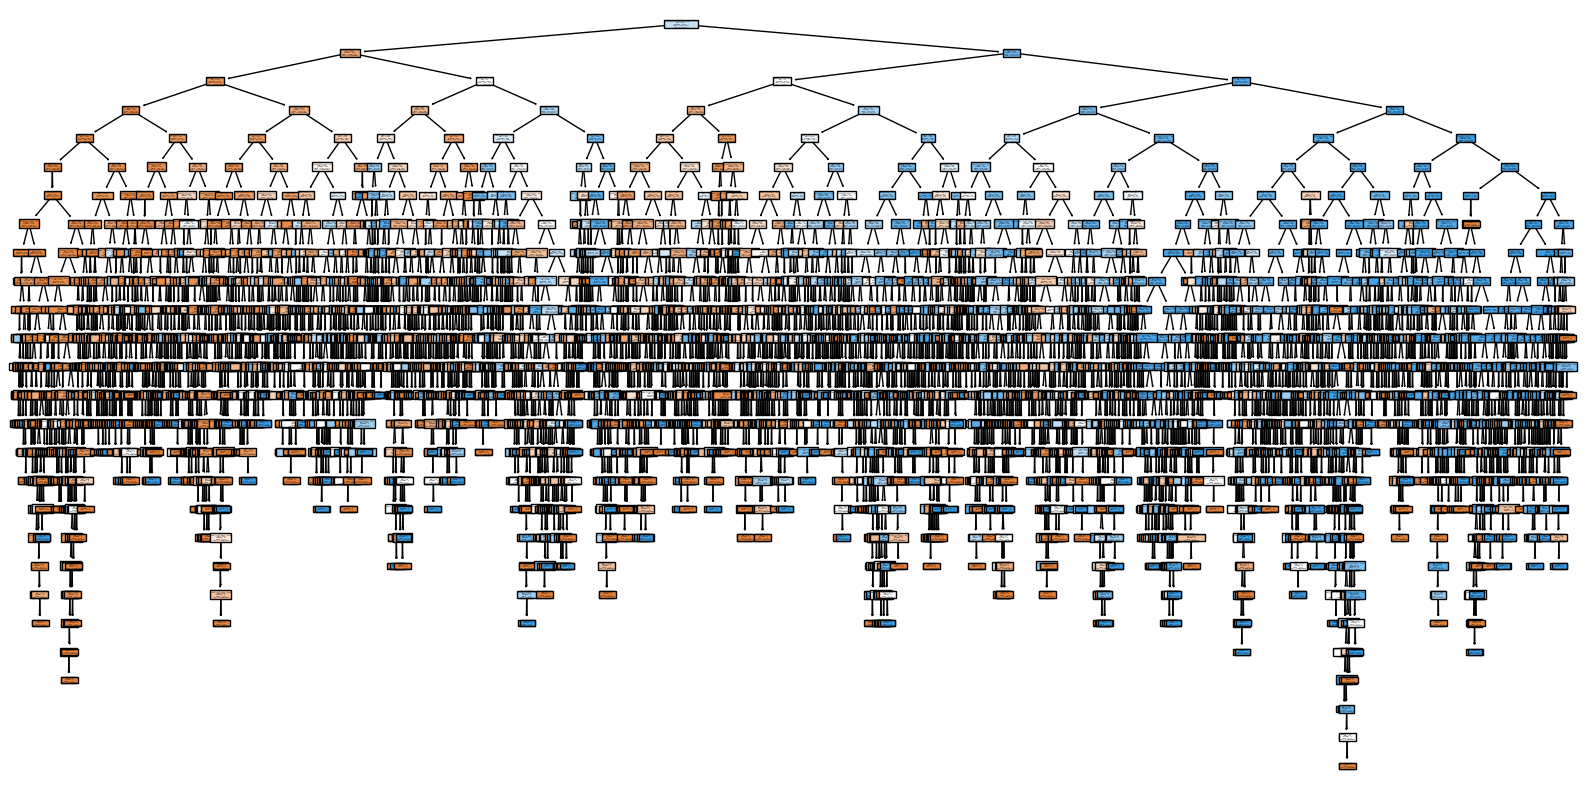

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model_dt, feature_names=X.columns, class_names=['No Depression', 'Depression'], filled=True)
plt.show()
